 Import Libraries
 

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

 Load the Dataset

In [5]:
data = pd.read_csv(r'E:\Machine learning Assignment\Assignment 5\Mall_Customers.csv')

Data Pre-processing

In [6]:
data = data.drop(columns=["CustomerID"])

Encode the 'Genre' column

In [7]:
label_encoder = LabelEncoder()
data['Genre'] = label_encoder.fit_transform(data['Genre'])

Normalize the numerical features (Age, Annual Income, Spending Score)

In [8]:
scaler = StandardScaler()
data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(
    data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

Train-Test Split
We focus on clustering based on "Spending Score (1-100)"

In [9]:
features = data[["Spending Score (1-100)"]]
X_train, X_test = train_test_split(features, test_size=0.2, random_state=42)

Apply K-Means Clustering

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)


KMeans(n_clusters=3, random_state=42)

Assign cluster labels to the training data

In [11]:
X_train['Cluster'] = kmeans.labels_

Visualize K-Means Clustering

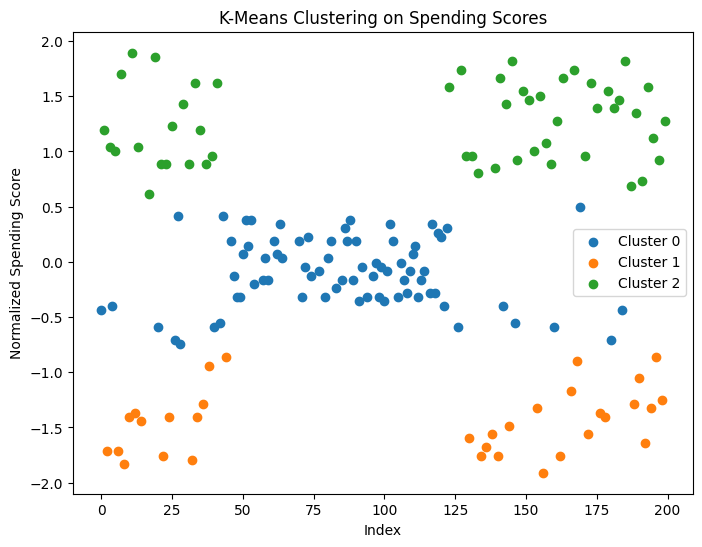

In [18]:
plt.figure(figsize=(8, 6))
for cluster in range(3):
    cluster_data = X_train[X_train['Cluster'] == cluster]
    plt.scatter(cluster_data.index, cluster_data["Spending Score (1-100)"], label=f"Cluster {cluster}")
    plt.title("K-Means Clustering on Spending Scores")
plt.xlabel("Index")
plt.ylabel("Normalized Spending Score")
plt.legend()
plt.show()


Apply DBSCAN Clustering

In [19]:
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Default parameters; can be adjusted
dbscan_labels = dbscan.fit_predict(X_train[["Spending Score (1-100)"]])

Assign cluster labels to the training data (note: -1 indicates noise/outliers)

In [20]:
X_train['DBSCAN_Cluster'] = dbscan_labels

Visualize DBSCAN Clustering

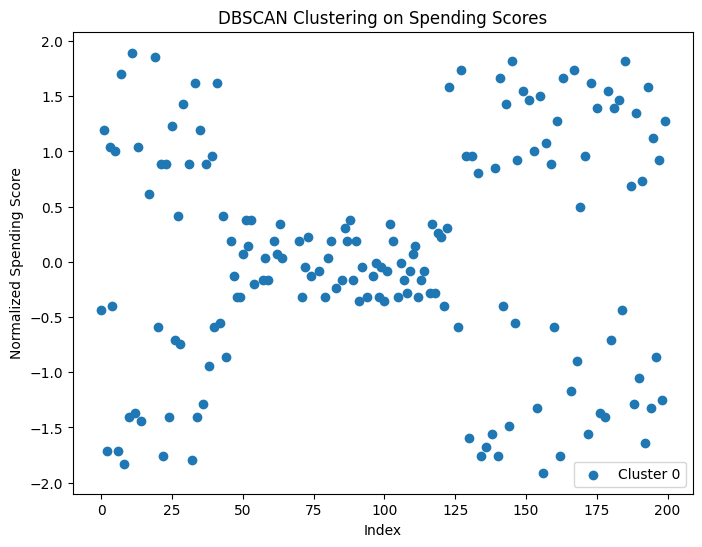

In [21]:
plt.figure(figsize=(8, 6))
unique_labels = set(dbscan_labels)
for label in unique_labels:
    cluster_data = X_train[X_train['DBSCAN_Cluster'] == label]
    plt.scatter(cluster_data.index, cluster_data["Spending Score (1-100)"], label=f"Cluster {label}")

plt.title("DBSCAN Clustering on Spending Scores")
plt.xlabel("Index")
plt.ylabel("Normalized Spending Score")
plt.legend()
plt.show()

This code accomplishes the following:

1.Loads and preprocesses the dataset.

2.Splits the dataset into training and testing sets.

3.Applies K-Means and DBSCAN clustering.

4.Visualizes the results for both algorithms.